In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Classification models:
to predict weather or not a person would leave based off some input features 

target: To perform the logistic and Knn algo on Teleco-churn dataset to compare bw the two.

In [2]:
df = pd.read_csv("churn_logistic.csv")

In [3]:
df.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [4]:
df.shape

(5700, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  5700 non-null   int64  
 1   VMail Message   5700 non-null   int64  
 2   Day Mins        5700 non-null   float64
 3   Eve Mins        5700 non-null   float64
 4   Night Mins      5700 non-null   float64
 5   Intl Mins       5700 non-null   float64
 6   CustServ Calls  5700 non-null   int64  
 7   Intl Plan       5700 non-null   int64  
 8   VMail Plan      5700 non-null   int64  
 9   Day Calls       5700 non-null   int64  
 10  Day Charge      5700 non-null   float64
 11  Eve Calls       5700 non-null   int64  
 12  Eve Charge      5700 non-null   float64
 13  Night Calls     5700 non-null   int64  
 14  Night Charge    5700 non-null   float64
 15  Intl Calls      5700 non-null   int64  
 16  Intl Charge     5700 non-null   float64
 17  State           5700 non-null   o

##### Obs: No missing data

#### Let's explore and understand the data

In [6]:
df

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,224,0,171.5,160.0,212.4,5.0,1,1,0,99,...,103,13.60,102,9.56,2,1.35,DE,510,361-6563,1
5696,131,0,131.6,179.3,251.2,15.5,1,0,0,95,...,109,15.24,129,11.30,3,4.19,MS,415,333-9002,1
5697,132,0,291.2,234.2,191.7,8.9,1,0,0,104,...,132,19.91,87,8.63,3,2.40,MI,408,389-4608,1
5698,100,0,113.3,197.9,284.5,11.7,4,0,0,96,...,89,16.82,93,12.80,2,3.16,MT,415,341-4873,1


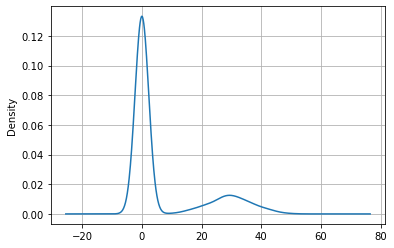

In [7]:
df['VMail Message'].plot(kind='kde')
plt.grid()

we have a lot of users send only zero voice message!

In [8]:
df

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,224,0,171.5,160.0,212.4,5.0,1,1,0,99,...,103,13.60,102,9.56,2,1.35,DE,510,361-6563,1
5696,131,0,131.6,179.3,251.2,15.5,1,0,0,95,...,109,15.24,129,11.30,3,4.19,MS,415,333-9002,1
5697,132,0,291.2,234.2,191.7,8.9,1,0,0,104,...,132,19.91,87,8.63,3,2.40,MI,408,389-4608,1
5698,100,0,113.3,197.9,284.5,11.7,4,0,0,96,...,89,16.82,93,12.80,2,3.16,MT,415,341-4873,1


C:\Users\Ashutosh Patidar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

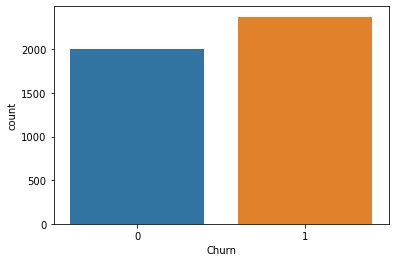

In [9]:
sns.countplot(df[df['VMail Message'] == 0].Churn)

C:\Users\Ashutosh Patidar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


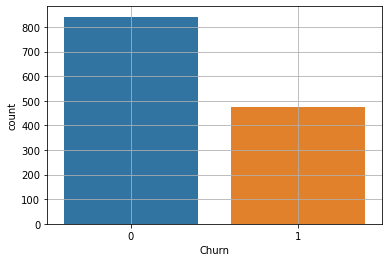

In [10]:
sns.countplot(df[df['VMail Message'] != 0].Churn)
plt.grid()

not significant impact on churning!

In [11]:
df

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,224,0,171.5,160.0,212.4,5.0,1,1,0,99,...,103,13.60,102,9.56,2,1.35,DE,510,361-6563,1
5696,131,0,131.6,179.3,251.2,15.5,1,0,0,95,...,109,15.24,129,11.30,3,4.19,MS,415,333-9002,1
5697,132,0,291.2,234.2,191.7,8.9,1,0,0,104,...,132,19.91,87,8.63,3,2.40,MI,408,389-4608,1
5698,100,0,113.3,197.9,284.5,11.7,4,0,0,96,...,89,16.82,93,12.80,2,3.16,MT,415,341-4873,1


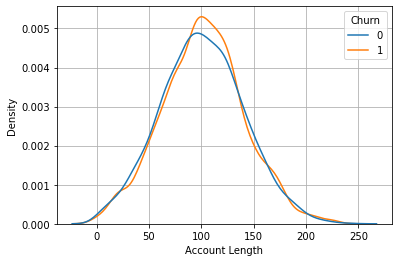

In [12]:
sns.kdeplot(df['Account Length'],hue = df['Churn'])
plt.grid()
plt.show()


##### Obs: no significant impact of account length on churning

In [13]:
import warnings

warnings.filterwarnings('ignore')

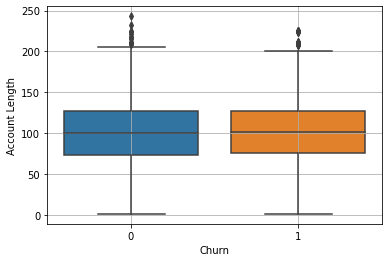

In [14]:
sns.boxplot(x = df['Churn'], y = df['Account Length'])
plt.grid()

##### Obs: outliers detected

<AxesSubplot:xlabel='Account Length', ylabel='Churn'>

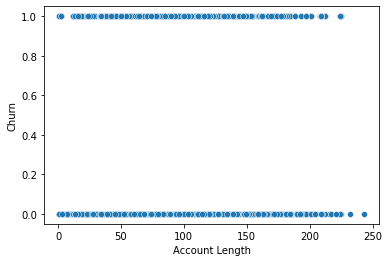

In [15]:
sns.scatterplot(y = df['Churn'], x = df['Account Length'])

let's remove the outliers!

In [16]:
iqr = np.percentile(df['Account Length'], 75) - np.percentile(df['Account Length'], 25)
mid = np.percentile(df['Account Length'], 50)

df[df['Account Length'] > mid + 1.5 * iqr]['Account Length'].size

150

##### Account Length has 150 outliers 

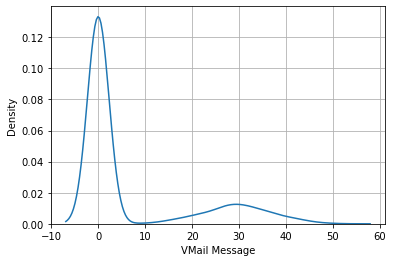

In [17]:
sns.kdeplot(df['VMail Message'])
plt.grid()

In [18]:
df

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,224,0,171.5,160.0,212.4,5.0,1,1,0,99,...,103,13.60,102,9.56,2,1.35,DE,510,361-6563,1
5696,131,0,131.6,179.3,251.2,15.5,1,0,0,95,...,109,15.24,129,11.30,3,4.19,MS,415,333-9002,1
5697,132,0,291.2,234.2,191.7,8.9,1,0,0,104,...,132,19.91,87,8.63,3,2.40,MI,408,389-4608,1
5698,100,0,113.3,197.9,284.5,11.7,4,0,0,96,...,89,16.82,93,12.80,2,3.16,MT,415,341-4873,1


<AxesSubplot:xlabel='Churn', ylabel='Day Mins'>

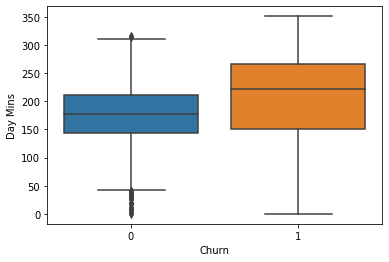

In [19]:
sns.boxplot(x = df.Churn, y = df['Day Mins'])

<AxesSubplot:xlabel='Churn', ylabel='Eve Mins'>

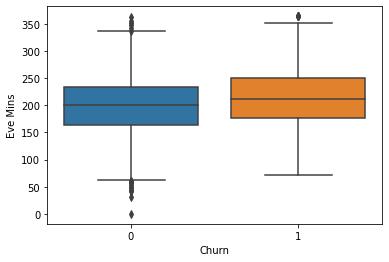

In [20]:
sns.boxplot(x = df.Churn, y = df['Eve Mins'])

<AxesSubplot:xlabel='Churn', ylabel='Night Mins'>

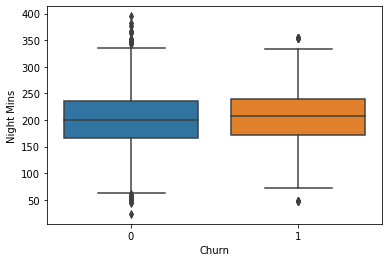

In [21]:
sns.boxplot(x = df.Churn, y = df['Night Mins'])

<AxesSubplot:xlabel='Churn'>

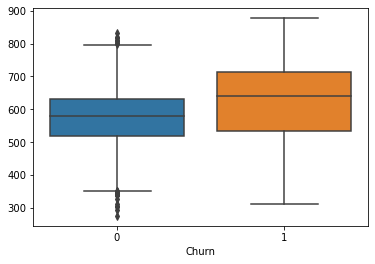

In [22]:
total_mins = df['Day Mins'] + df['Eve Mins'] + df['Night Mins']
sns.boxplot(x = df.Churn, y = total_mins)

<AxesSubplot:>

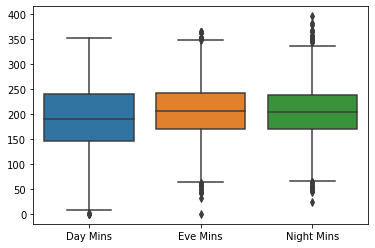

In [23]:
df_sel = df[['Day Mins', 'Eve Mins', 'Night Mins']]
sns.boxplot(data = df_sel)

##### Obs: outliers detected! and talking mins isn't significantly impacting weather or not a person churn

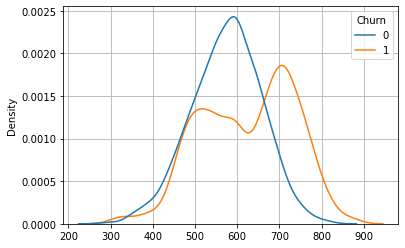

In [24]:
sns.kdeplot(total_mins , hue=df.Churn)
plt.grid()

<AxesSubplot:>

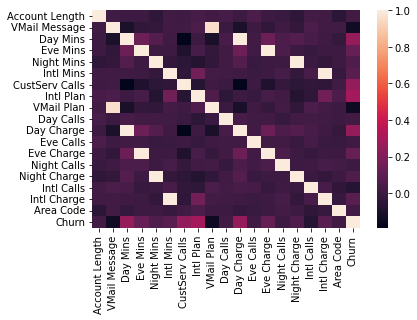

In [25]:
sns.heatmap(df.corr())

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df['VMail Plan'], df['Churn'])

array([[2008, 2374],
       [ 842,  476]], dtype=int64)

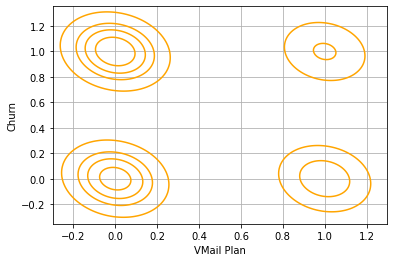

In [27]:
sns.kdeplot(df['VMail Plan'], df['Churn'], levels=5, color='orange')
plt.grid()

##### by observing above matrix we can clearly see that the persons not taking the vmail plans are churning the most, which don't make any sense hence vmail can be also considered unnecessary

In [28]:
df.drop(['Phone'], axis = 1, inplace = True)

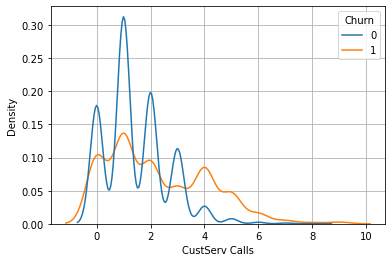

In [29]:
sns.kdeplot(df['CustServ Calls'], hue = df.Churn)
plt.grid()

##### obs: the persons who does a little higher no of customer calls are likely to churn: hence it's a good feature!

<AxesSubplot:>

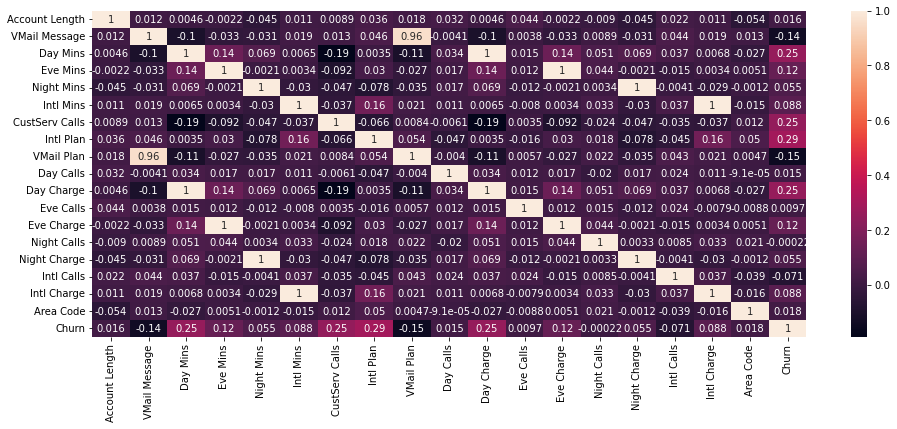

In [30]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot=True)

##### also we can notice that CustServ calls has a comparatively good depencency with the curining of the customers... with correlation = 0.29

In [31]:
df

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,224,0,171.5,160.0,212.4,5.0,1,1,0,99,29.16,103,13.60,102,9.56,2,1.35,DE,510,1
5696,131,0,131.6,179.3,251.2,15.5,1,0,0,95,22.37,109,15.24,129,11.30,3,4.19,MS,415,1
5697,132,0,291.2,234.2,191.7,8.9,1,0,0,104,49.50,132,19.91,87,8.63,3,2.40,MI,408,1
5698,100,0,113.3,197.9,284.5,11.7,4,0,0,96,19.26,89,16.82,93,12.80,2,3.16,MT,415,1


In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df['Intl Plan'], df['Churn'])

array([[2664, 2032],
       [ 186,  818]], dtype=int64)

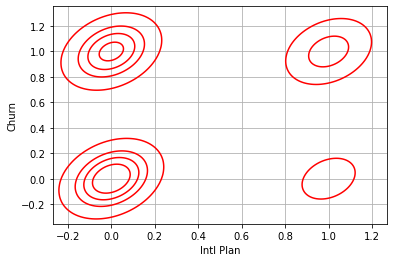

In [33]:
sns.kdeplot(df['Intl Plan'], df['Churn'], levels=5, color='red')
plt.grid()

In [34]:
# sns.kdeplot(df['Churn'], df['Account Length'], levels=5, color='red')

In [35]:
df

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,224,0,171.5,160.0,212.4,5.0,1,1,0,99,29.16,103,13.60,102,9.56,2,1.35,DE,510,1
5696,131,0,131.6,179.3,251.2,15.5,1,0,0,95,22.37,109,15.24,129,11.30,3,4.19,MS,415,1
5697,132,0,291.2,234.2,191.7,8.9,1,0,0,104,49.50,132,19.91,87,8.63,3,2.40,MI,408,1
5698,100,0,113.3,197.9,284.5,11.7,4,0,0,96,19.26,89,16.82,93,12.80,2,3.16,MT,415,1


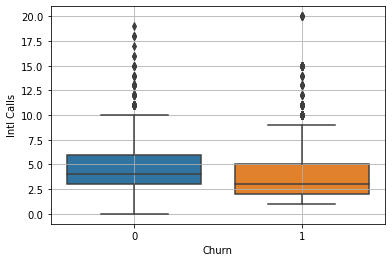

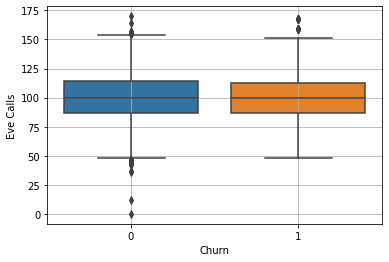

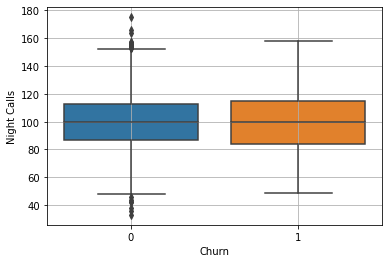

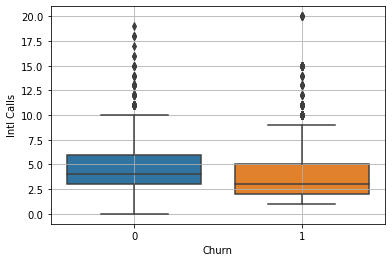

<AxesSubplot:xlabel='Churn'>

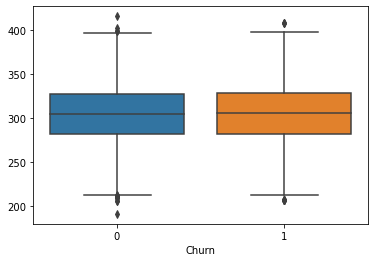

In [36]:
derived = df['Day Calls'] + df['Eve Calls'] + df['Night Calls'] + df['Intl Calls']
sns.boxplot(x = df.Churn, y =  df['Intl Calls'] )
plt.grid()
plt.show()
sns.boxplot(x = df.Churn, y =  df['Eve Calls'] )
plt.grid()
plt.show()
sns.boxplot(x = df.Churn, y =  df['Night Calls'] )
plt.grid()
plt.show()
sns.boxplot(x = df.Churn, y =   df['Intl Calls'] )
plt.grid()
plt.show()
sns.boxplot(x = df.Churn, y =   derived )


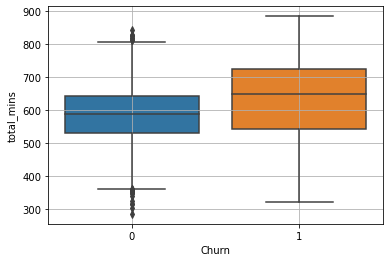

In [37]:
df['total_mins'] = df['Day Mins'] + df['Eve Mins'] + df['Night Mins'] + df['Intl Mins']
sns.boxplot(x=df.Churn, y=df.total_mins)
plt.grid()

##### significant feature

##### removing some of the unnecessary columns based off above observations

In [38]:
df.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Intl Plan', 'VMail Plan', 'Day Calls',
       'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge',
       'Intl Calls', 'Intl Charge', 'State', 'Area Code', 'Churn',
       'total_mins'],
      dtype='object')

In [39]:
df.drop(['Day Mins', 'Eve Mins', 'Night Mins',
'Intl Mins','Day Calls',
       'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge', 'Intl Charge'], axis = 1, inplace = True)
df.head()

,Account Length,VMail Message,CustServ Calls,Intl Plan,VMail Plan,Intl Calls,State,Area Code,Churn,total_mins
0,128,25,1,0,1,3,KS,415,0,717.2
1,107,26,1,0,1,3,OH,415,0,625.2
2,137,0,0,0,0,5,NJ,415,0,539.4
3,84,0,2,1,0,7,OH,408,0,564.8
4,75,0,3,1,0,3,OK,415,0,512.0


##### looking for anymore feature having no impact of churning of the customer

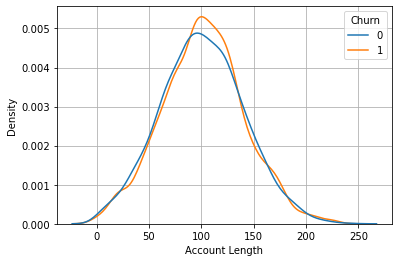

In [40]:
sns.kdeplot(df['Account Length'], hue = df.Churn )
plt.grid()

##### obs: account length has no significant impact on the curning of the customer 

In [41]:
df.drop(columns=['Account Length'], inplace = True)
df.head()

,VMail Message,CustServ Calls,Intl Plan,VMail Plan,Intl Calls,State,Area Code,Churn,total_mins
0,25,1,0,1,3,KS,415,0,717.2
1,26,1,0,1,3,OH,415,0,625.2
2,0,0,0,0,5,NJ,415,0,539.4
3,0,2,1,0,7,OH,408,0,564.8
4,0,3,1,0,3,OK,415,0,512.0


In [42]:
df['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

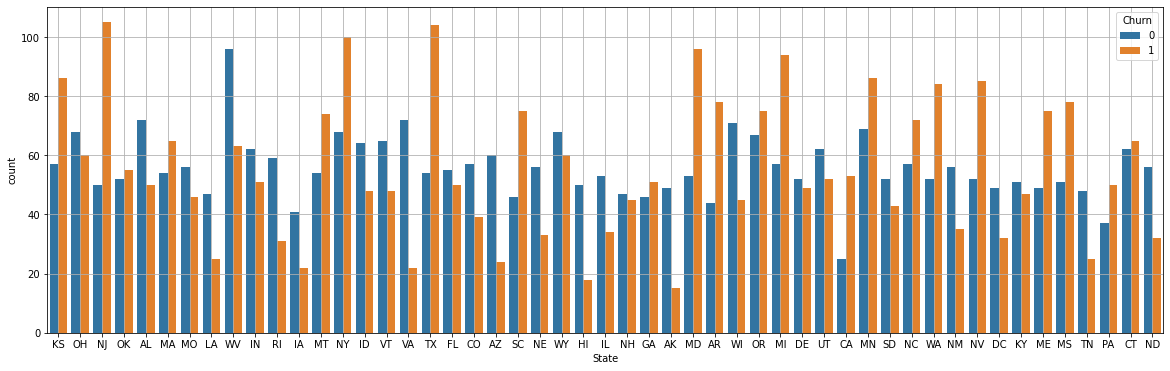

In [43]:
plt.figure(figsize=(20,6))
sns.countplot(df.State, hue = df.Churn)
plt.grid()

##### we need to do target mean encoding for the state feature

In [44]:
df.head()

,VMail Message,CustServ Calls,Intl Plan,VMail Plan,Intl Calls,State,Area Code,Churn,total_mins
0,25,1,0,1,3,KS,415,0,717.2
1,26,1,0,1,3,OH,415,0,625.2
2,0,0,0,0,5,NJ,415,0,539.4
3,0,2,1,0,7,OH,408,0,564.8
4,0,3,1,0,3,OK,415,0,512.0


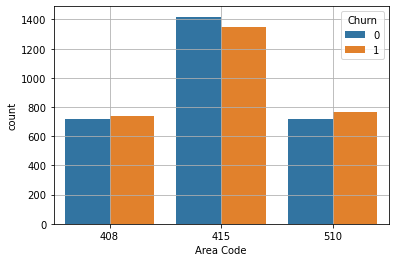

In [45]:
sns.countplot(df['Area Code'], hue = df.Churn)
plt.grid()

##### no significant effect of area code on churing of the customer

to perform EDA and check for multicoliniarity, outliers, encodings and starnge behaviour in the data

In [46]:
df.drop(columns=['Area Code'], inplace=True)

In [47]:
df.head()

,VMail Message,CustServ Calls,Intl Plan,VMail Plan,Intl Calls,State,Churn,total_mins
0,25,1,0,1,3,KS,0,717.2
1,26,1,0,1,3,OH,0,625.2
2,0,0,0,0,5,NJ,0,539.4
3,0,2,1,0,7,OH,0,564.8
4,0,3,1,0,3,OK,0,512.0


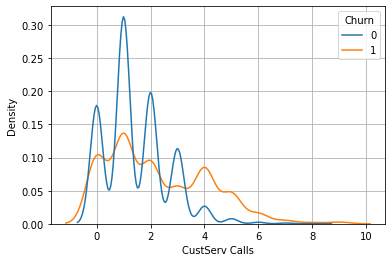

In [48]:
sns.kdeplot(df['CustServ Calls'], hue = df.Churn)
plt.grid()

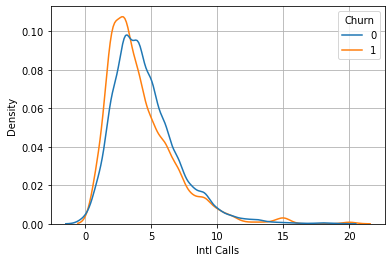

In [49]:
sns.kdeplot(df['Intl Calls'], hue = df.Churn)
plt.grid()

##### let's perform the target mean endcoding on the state feature

In [50]:
df.head()

,VMail Message,CustServ Calls,Intl Plan,VMail Plan,Intl Calls,State,Churn,total_mins
0,25,1,0,1,3,KS,0,717.2
1,26,1,0,1,3,OH,0,625.2
2,0,0,0,0,5,NJ,0,539.4
3,0,2,1,0,7,OH,0,564.8
4,0,3,1,0,3,OK,0,512.0


In [51]:
dct = {}
for i in df['State'].unique():
    dct[i] = len(df[df.State == i].Churn == 1)
dct

{'KS': 143,
 'OH': 128,
 'NJ': 155,
 'OK': 107,
 'AL': 122,
 'MA': 119,
 'MO': 102,
 'LA': 72,
 'WV': 159,
 'IN': 113,
 'RI': 90,
 'IA': 63,
 'MT': 128,
 'NY': 168,
 'ID': 112,
 'VT': 113,
 'VA': 94,
 'TX': 158,
 'FL': 105,
 'CO': 96,
 'AZ': 84,
 'SC': 121,
 'NE': 89,
 'WY': 128,
 'HI': 68,
 'IL': 87,
 'NH': 92,
 'GA': 97,
 'AK': 64,
 'MD': 149,
 'AR': 122,
 'WI': 116,
 'OR': 142,
 'MI': 151,
 'DE': 101,
 'UT': 114,
 'CA': 78,
 'MN': 155,
 'SD': 95,
 'NC': 129,
 'WA': 136,
 'NM': 91,
 'NV': 137,
 'DC': 81,
 'KY': 98,
 'ME': 124,
 'MS': 129,
 'TN': 73,
 'PA': 87,
 'CT': 127,
 'ND': 88}

##### replacing the value

In [52]:
new = []
for i in df.State:
    new.append(dct[i])
new

[143,
 128,
 155,
 128,
 107,
 122,
 119,
 102,
 72,
 159,
 113,
 90,
 63,
 128,
 63,
 168,
 112,
 113,
 94,
 158,
 105,
 96,
 84,
 121,
 94,
 89,
 128,
 128,
 102,
 68,
 87,
 92,
 72,
 84,
 107,
 97,
 64,
 119,
 64,
 155,
 97,
 149,
 122,
 112,
 116,
 142,
 151,
 101,
 112,
 128,
 63,
 113,
 94,
 114,
 128,
 113,
 96,
 96,
 116,
 107,
 112,
 78,
 155,
 95,
 129,
 136,
 128,
 155,
 114,
 158,
 155,
 155,
 91,
 137,
 68,
 155,
 81,
 168,
 155,
 149,
 159,
 142,
 96,
 97,
 158,
 113,
 113,
 159,
 98,
 155,
 81,
 72,
 122,
 124,
 84,
 64,
 128,
 84,
 129,
 112,
 63,
 119,
 113,
 98,
 113,
 84,
 151,
 91,
 96,
 114,
 151,
 119,
 122,
 101,
 84,
 124,
 155,
 137,
 102,
 112,
 89,
 158,
 149,
 129,
 137,
 84,
 129,
 129,
 158,
 89,
 89,
 78,
 155,
 158,
 122,
 122,
 168,
 105,
 64,
 137,
 101,
 149,
 151,
 113,
 113,
 151,
 136,
 114,
 72,
 90,
 63,
 89,
 128,
 90,
 107,
 72,
 128,
 94,
 102,
 105,
 121,
 94,
 63,
 151,
 107,
 101,
 97,
 81,
 84,
 122,
 96,
 92,
 91,
 142,
 72,
 89,
 155,
 1

In [53]:
print(len(dct))
print(len(new))

51
5700


In [54]:
new = pd.DataFrame(new)
new['State_enc'] = new
# new.drop(columns=[')'])
new.head()

,0,State_enc
0,143,143
1,128,128
2,155,155
3,128,128
4,107,107


In [55]:
df['State_enc'] = new['State_enc']
df.columns

Index(['VMail Message', 'CustServ Calls', 'Intl Plan', 'VMail Plan',
       'Intl Calls', 'State', 'Churn', 'total_mins', 'State_enc'],
      dtype='object')

In [56]:
df.head()

,VMail Message,CustServ Calls,Intl Plan,VMail Plan,Intl Calls,State,Churn,total_mins,State_enc
0,25,1,0,1,3,KS,0,717.2,143
1,26,1,0,1,3,OH,0,625.2,128
2,0,0,0,0,5,NJ,0,539.4,155
3,0,2,1,0,7,OH,0,564.8,128
4,0,3,1,0,3,OK,0,512.0,107


In [57]:
df.drop(columns='State', inplace = True)
df.head()

,VMail Message,CustServ Calls,Intl Plan,VMail Plan,Intl Calls,Churn,total_mins,State_enc
0,25,1,0,1,3,0,717.2,143
1,26,1,0,1,3,0,625.2,128
2,0,0,0,0,5,0,539.4,155
3,0,2,1,0,7,0,564.8,128
4,0,3,1,0,3,0,512.0,107


In [58]:
X = df.drop(columns=['Churn'])
y = df.Churn

In [59]:
X.head()

,VMail Message,CustServ Calls,Intl Plan,VMail Plan,Intl Calls,total_mins,State_enc
0,25,1,0,1,3,717.2,143
1,26,1,0,1,3,625.2,128
2,0,0,0,0,5,539.4,155
3,0,2,1,0,7,564.8,128
4,0,3,1,0,3,512.0,107


##### Standerizing the data

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6
0,0.490196,0.111111,0.0,1.0,0.15,0.720659,0.761905
1,0.509804,0.111111,0.0,1.0,0.15,0.567505,0.619048
2,0.000000,0.000000,0.0,0.0,0.25,0.424671,0.876190
3,0.000000,0.222222,1.0,0.0,0.35,0.466955,0.619048
4,0.000000,0.333333,1.0,0.0,0.15,0.379058,0.419048


##### splitting the data into train and test

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

##### logistic regression:

In [62]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[444, 141],
       [125, 430]], dtype=int64)

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       585
           1       0.75      0.77      0.76       555

    accuracy                           0.77      1140
   macro avg       0.77      0.77      0.77      1140
weighted avg       0.77      0.77      0.77      1140



##### KNN:

In [65]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred_knn = model.predict(X_test)
confusion_matrix(y_test,y_pred_knn)

array([[476, 109],
       [ 20, 535]], dtype=int64)

In [66]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88       585
           1       0.83      0.96      0.89       555

    accuracy                           0.89      1140
   macro avg       0.90      0.89      0.89      1140
weighted avg       0.90      0.89      0.89      1140



##### Obs: knn is perfroming better than logistic regression in terms of accuracy

##### here knn is performing really good in terms of recall...ie it's predicting almost 96% true positives out of all actual postives...which is required here in this business case

In [67]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred_knn = model.predict(X_test)
confusion_matrix(y_test,y_pred_knn)

array([[476, 109],
       [ 20, 535]], dtype=int64)

##### let's check with different values of k

In [68]:
train_score = []
test_score = []
from sklearn.metrics import accuracy_score
for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y1_pred_knn = model.predict(X_train)
    y2_pred_knn = model.predict(X_test)
    train_score.append(accuracy_score(y_train,y1_pred_knn))
    test_score.append(accuracy_score(y_test,y2_pred_knn))

##### plotting with accuracy score

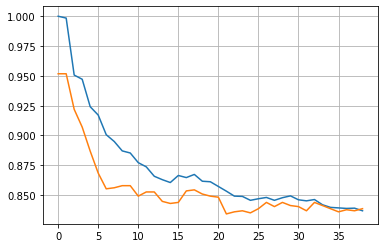

In [69]:
plt.plot(train_score)
plt.plot(test_score)
plt.grid()

In [70]:
train_rec_score = []
test_rec_score = []
from sklearn.metrics import recall_score
for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y1_pred_knn = model.predict(X_train)
    y2_pred_knn = model.predict(X_test)
    train_rec_score.append(recall_score(y_train,y1_pred_knn))
    test_rec_score.append(recall_score(y_test,y2_pred_knn))

##### plotting with recall score

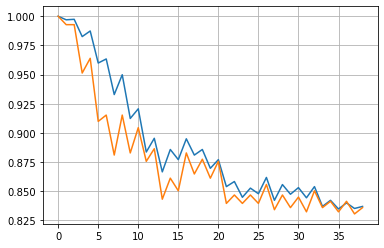

In [71]:
plt.plot(train_rec_score)
plt.plot(test_rec_score)
plt.grid()

##### but here we can observe some contradiction, how could the test data has this high accuracy with k = 1

##### let's replot the same graph with splitting the data once again with different random state

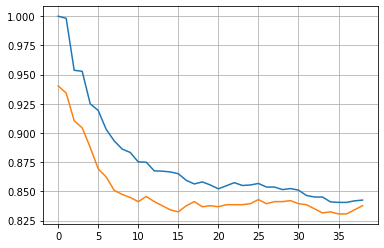

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=50)

train_score = []
test_score = []
from sklearn.metrics import accuracy_score
for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y1_pred_knn = model.predict(X_train)
    y2_pred_knn = model.predict(X_test)
    train_score.append(accuracy_score(y_train,y1_pred_knn))
    test_score.append(accuracy_score(y_test,y2_pred_knn))

plt.plot(train_score)
plt.plot(test_score)
plt.grid()

##### kind of similar nature: could be explained based off the nature of the data

##### logistic regression with different random state

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=43)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_new = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_pred_new,y_test))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       575
           1       0.78      0.77      0.78       565

    accuracy                           0.78      1140
   macro avg       0.78      0.78      0.78      1140
weighted avg       0.78      0.78      0.78      1140



#### now let's plot the ruc-auc curve for the logistic regression model

In [74]:
y_prob = model.predict_proba(X_test)
from sklearn.metrics import roc_auc_score
# tpr, fpr, thresholds = roc_auc_score(y_test,pd.DataFrame(y_prob[:,1]))
auc = roc_auc_score(y_test, y_prob[:,1])
auc

0.8458520058520058

In [75]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])

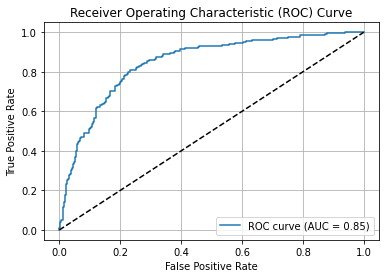

In [76]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()



##### ROC score: 0.85 is quite good!

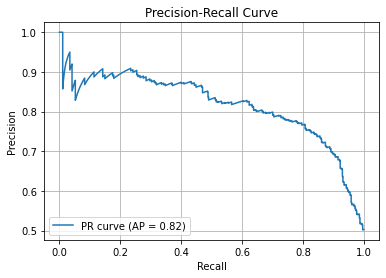

In [77]:
from sklearn.metrics import precision_recall_curve, average_precision_score

y_prob = model.predict_proba(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1])
average_precision = average_precision_score(y_test, y_prob[:, 1])

# Plot PR curve
plt.figure()
plt.plot(recall, precision, label='PR curve (AP = {:.2f})'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
plt.show()


##### observation: descent performance 

### Dicision Trees:


##### first see the default observation

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=41)
from sklearn.tree import DecisionTreeClassifier
dic_tree = DecisionTreeClassifier()
dic_tree.fit(X_train, y_train)
y_pred_dic = dic_tree.predict(X_test)
print(classification_report(y_test, y_pred_dic))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       591
           1       0.93      1.00      0.96       549

    accuracy                           0.96      1140
   macro avg       0.96      0.96      0.96      1140
weighted avg       0.96      0.96      0.96      1140



In [85]:
!pip install graphviz

In [91]:
from sklearn.tree import export_graphviz
import graphviz

In [103]:
!pip install pydotplus

##### now lets apply hypterparameter tuning

In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

dic_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(dic_tree, param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=43)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_params
# best_model

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [141]:
y_best = best_model.predict(X_test)
print(classification_report(y_test,y_best))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       585
           1       0.92      1.00      0.96       555

    accuracy                           0.96      1140
   macro avg       0.96      0.96      0.96      1140
weighted avg       0.96      0.96      0.96      1140



##### observed excellent accuracy!

### Random Forest:

##### default observation

In [156]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       585
           1       0.94      1.00      0.97       555

    accuracy                           0.97      1140
   macro avg       0.97      0.97      0.97      1140
weighted avg       0.97      0.97      0.97      1140



##### performing quite well 

#####  now lest see by using hyperparameter tuning

In [157]:
clf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_params

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [158]:
predicts = best_model.predict(X_test)
print(classification_report(y_test,predicts))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       585
           1       0.95      1.00      0.97       555

    accuracy                           0.97      1140
   macro avg       0.97      0.97      0.97      1140
weighted avg       0.97      0.97      0.97      1140



### If anywhere in the notebook, if you find any point of disscussion pls comment down below!

##### thanks and have a good day!